# Analyzing the retrievals of full LES cases
- 3 ways being used
1. Native resolution
2. Domain-averaged 
3. Native resolution-single pixel

In [2]:
#from pol_ret_analysis import *
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from cpnLES_MSCARTlib import LES_case
from cpnRetrievalslib import  Pol_ret_P12Lib
import cpnCommonlib as cpn
cpn.setup_figures(plt)
#case definitions
sza='140'
vza=0
band='0p860'
method='Breon' #see Pmat help 

#Loading P12 library
P12Lib=Pol_ret_P12Lib(fname='Pol_ret_PM_library_0p860_2p13_V3.hdf5')
P12Lib.loadP12Lib()

#Reading RT simulations
'''
LEScase=LES_case('DYCOMS2_dharma_008036_b'+band+'_MSCART_SZA'+str(sza)+'_SAA000_VAA000plus_NPH2e6.hdf5',\
                 '/umbc/xfs1/zzbatmos/users/charaj1/LES_MSCART_v2/',\
                 RT1Dname='DYCOMS2_dharma_008036_b'+band+'_MSCART_1D_bins_SZA'+str(sza)+'_SAA000_VAA000plus_NPH1e5.hdf5')
'''
LEScase=LES_case('ATEXc_dharma_007877_b'+band+'_MSCART_SZA'+str(sza)+'_SAA000_VAA000plus_NPH1e6.hdf5',\
                 '/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/',\
                 RT1Dname='ATEXc_dharma_007877_b'+band+'_MSCART_1D_bins_SZA'+str(sza)+'_SAA000_VAA000plus_NPH1e5.hdf5')
#Reading NJK retrievals
ret_save_dir='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/Retrievals/NJK_retrievals/data/'
NJK=cpn.load_obj(ret_save_dir+'NJK_retrievals_DYCOMS2_dharma_008036_b2p13_b0p860_MSCART_SZA'+sza+'_SAA000_VAA000plus_NPH2e6',\
                           encoding='latin1')

/umbc/xfs1/zzbatmos/users/charaj1/taki/softs/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Attempting to read <class 'cpnRetrievalslib.NJK_retrievals'>


In [8]:
#ATEXc cases with high Rp MC noise
arr=np.array([[ 13,  14,  14,  14,  25,  26,  27,  27,  28,  28,  28,  28,  29,
         29,  30,  30,  31,  31,  31,  32,  33,  33,  34,  34,  35,  35,
         36,  36,  36,  37,  37,  37,  38,  38,  39,  73,  74,  74,  75,
         75,  76, 102, 102, 103, 103, 105, 105, 105, 106, 116, 116, 116,
        116, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118,
        119, 119, 119, 119, 120, 120, 120, 120, 120, 121, 121, 121, 121,
        121, 122, 122, 122, 122, 122],
       [ 52,  52,  53,  54,  58,  94,  94,  95,  92,  93,  94,  96,  93,
         95,  93, 112, 109, 111, 112, 108, 110, 112, 109, 110, 107, 109,
        109, 110, 111, 108, 109, 110, 111, 113, 112,  80,  79,  80,  69,
         79,  79,  78,  79,  79,  80,  78,  79,  80,  79,  75,  77,  79,
         83,  74,  75,  77,  81,  83,  73,  74,  76,  78,  81,  82,  83,
         72,  76,  80,  84,  74,  75,  77,  80,  81,  77,  78,  79,  80,
         82,  76,  77,  78,  79,  80]])

## Native resolution retrievals

Attempting to read <class 'dict'>
Pol. ret. method: Breon primaryBow: True
either one angle has only one occurrence
figures/(83)ATEXc_dharma_007877_b0p860_MSCART_SZA140_SAA000_VAA000plus_NPH1e6_Breon_full_pol_ret_V5_MPI_checking_fitX13Y52_x0p7y2p6.png SAVED.


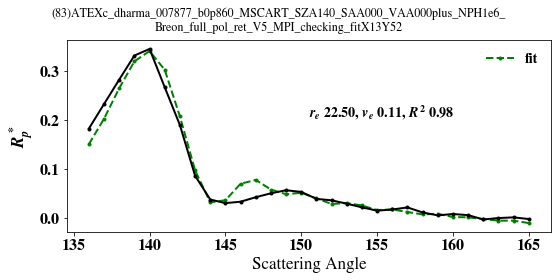

In [11]:
from pol_ret_analysis import check_fit2
#Reading Polarimetric retrievals
#Without primary bow
'''
path='results/pol_ret_V4/'
filename='DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA'+SZA+'_SAA000_VAA000plus_NPH2e6_Breon_full_pol_ret_V4_MPI'; primaryBow=False
'''
#With primary bow
path=''
#filename='DYCOMS2_dharma_008036_b0p860_MSCART_SZA120_SAA000_VAA000plus_NPH2e6_Breon_full_pol_ret_V5_MPI'; primaryBow=True
#filename='ATEXc_dharma_007877_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH1e6_Breon_full_pol_ret_V5_MPI';primaryBow=True
filename='ATEXc_dharma_007877_b0p860_MSCART_SZA140_SAA000_VAA000plus_NPH1e6_Breon_full_pol_ret_V5_MPI';primaryBow=True
data=cpn.load_obj(path+filename,encoding='latin1')

ret_Re=data['ret_Re']
ret_Ve=data['ret_Ve']
abc   =data['abc']
Qls   =data['Qls']
Rsq   =data['Rsq']
yAll  =data['yAll']
x     =data['x']


#X,Y=arr[0,j],arr[1,j]
X,Y=13,52
Q_in2= LEScase.RT.MeanPRad[:,X,Y,1]
abc=abc[X,Y,:]
ret_Re=ret_Re[X,Y]
ret_Ve=ret_Ve[X,Y]
Rsq=Rsq[X,Y]
fig1_ttl='(%d)'%j+filename+'_checking_fitX%dY%d'%(X,Y)

fig1,ax1=check_fit2(yAll[X,Y],x,abc,ret_Re,ret_Ve,Rsq,P12Lib,LEScase,method,primaryBow=primaryBow)
'''
#Overplot different re ve pattern from the libarary
P=Pmat(P12Lib.re,P12Lib.ve,P12Lib.bulk_Mie_ang,P12Lib.avP12['0p860'],LEScase.RT.ScatA,method=method,primaryBow=primaryBow)
P.set_reve(ret_Re,ret_Ve)
ax2=ax1.twinx()
ax2.plot(x,-P.getP(x),'r.-')
P.set_reve(24.84,0.08)
ax2.plot(x,-P.getP(x),'r.--')
P.set_reve(17.00,0.05)
ax2.plot(x,-P.getP(x),'r+--')
ax2.set_ylabel('-$P_{12}$',color='r')
'''
fig1.suptitle("\n".join(wrap(fig1_ttl,70)),size=12)
fig1.tight_layout(rect=[0,0,1,0.92])

cpn.savefig(fig1,fig1_ttl+'_x%0.1fy%0.1f'%(LEScase.xcens[X],LEScase.ycens[Y]),'figures/')

In [294]:
yAll[X,Y]

array([-0.01493127,  0.02755284, -0.0130213 , -0.05185294,  0.0264134 ,
        0.11819414,  0.08556806,  0.03892141,  0.12398105,  0.14462015,
        0.14095612,  0.13251377,  0.16232029,  0.25240532,  0.39158189,
        0.56047613,  0.59867113,  0.48438313,  0.2422878 ,  0.13913165,
        0.29075108,  0.75544687,  1.32268746,  1.8183012 ,  2.1078117 ,
        2.1254419 ,  1.92479422,  1.58880867,  1.28902934,  1.02397364])

## Domain average retrievals

Attempting to read <class 'dict'>
Pol. ret. method: Breon primaryBow: True
[-1.63670093 -0.19671222  0.5810861 ]


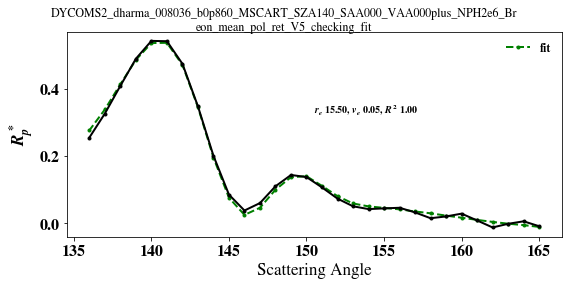

In [39]:
#Reading Polarimetric retrievals
#filename='DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH2e6_Breon_mean_pol_ret'
filename='DYCOMS2_dharma_008036_b0p860_MSCART_SZA140_SAA000_VAA000plus_NPH2e6_Breon_mean_pol_ret_V5'; primaryBow=True
data=cpn.load_obj(filename,encoding='latin1')
ret_Re=data['ret_Re']
ret_Ve=data['ret_Ve']
abc   =data['abc']
Qls   =data['Qls']
Rsq   =data['Rsq']
Q_in2= LEScase.RT.MeanPRad[:,:,:,1].mean(axis=1).mean(axis=1)
fig1_ttl=filename+'_checking_fit'
fig1,ax1=check_fit(Q_in2,abc,ret_Re,ret_Ve,Rsq,P12Lib,LEScase,method,primaryBow=primaryBow)
fig1.suptitle("\n".join(wrap(fig1_ttl,70)),size=12)
fig1.tight_layout(rect=[0,0,1,0.93])
print(abc)



## Native resolution single pixel
### (With and w/o primary bow)

Attempting to read <class 'dict'>
Pol. ret. method: Breon primaryBow: True
[-1.69887028 -0.18750292  0.56101659]


Replace existing file?:  y


figures/DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH2e6_Breon_pixelX120Y120_pol_ret_V5_checking_fit.png SAVED.


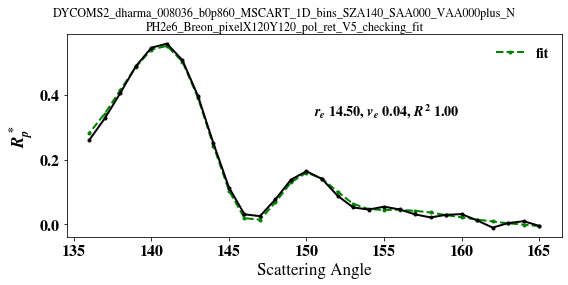

In [6]:
#Without primary bow
#filename='DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH2e6_Breon_pixelX120Y120_pol_ret'; primaryBow=False
#With primary bow
filename='DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH2e6_Breon_pixelX120Y120_pol_ret_V5'; primaryBow=True
X,Y=120,120
data=cpn.load_obj(filename,encoding='latin1')
ret_Re=data['ret_Re']
ret_Ve=data['ret_Ve']
abc   =data['abc']
Qls   =data['Qls']
Rsq   =data['Rsq']
yAll  =data['yAll']
x     =data['x']
Q_in2= LEScase.RT.MeanPRad[:,X,Y,1]
fig1_ttl=filename+'_checking_fit'
fig1,ax1=check_fit2(yAll,x,abc,ret_Re,ret_Ve,Rsq,P12Lib,LEScase,method,primaryBow=primaryBow)
fig1.suptitle("\n".join(wrap(fig1_ttl,70)),size=12)
fig1.tight_layout(rect=[0,0,1,0.92])
print(abc)
cpn.savefig(fig1,fig1_ttl,'figures/')

In [5]:
LEScase.RT1D.RMSEPRad.shape

(121,)

In [6]:
np.delete(LEScase.RT.RMSEPRad,60,0).shape

(120, 128, 128, 4)

# Performing and analyzing single column polarimetric retrievals
Directly MSCART first output of a single LES column is used to do polarimetric retrievals and check the fit.

In [280]:
import numpy as np
from cpnRetrievalslib import fitBreon_noRsq as do_fitting
from cpnLES_MSCARTlib import POLCARTdset
from cpnRetrievalslib import Pol_ret_P12Lib, Pmat
from pol_cloud_ret import getGuess

Reading single column 1D MSCART results

In [280]:
RT=POLCARTdset('onecolumn','/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/1Druns/LESb0p860_bins/')
RT.readMSCARTplus('ATEXc_dharma_007877_b0p860y120x79_MSCART_SZA140_SAA000_VAA000plus_NPH1e5.nc',\
                  fdpath='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/1Druns/results/LESb0p860_bins/',clm=True,prnt=False,step=True)

Reading 3D MSCART results

In [296]:
base_dir='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/'
RT=POLCARTdset('LES3D',base_dir)
RT.readPOLCARThdf5('ATEXc_dharma_007877_b0p860_MSCART_SZA140_SAA000_VAA000plus_NPH1e6.hdf5',dpath=base_dir+'results/b0p860/')

/umbc/xfs1/zzbatmos/users/charaj1/taki/softs/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [297]:
RT.MeanPRad.shape

(122, 144, 144, 4)

Reading P12 library for polarimetric retrievals

In [146]:
P12Lib=Pol_ret_P12Lib(fname='Pol_ret_PM_library_0p860_2p13_V3.hdf5')
P12Lib.loadP12Lib()

Give Rq as Q_in2. Include all scattering angles (~122)

In [281]:
method='Breon';rTyp='1D';tail='_pol_ret_V5'
Q_in2=RT.MeanPRad[:,1]
muV=np.cos(np.deg2rad(RT.VZA))
muS=np.cos(np.deg2rad(180-RT.SZA))
obsSca=RT.ScatA
P=Pmat(P12Lib.re,P12Lib.ve,P12Lib.bulk_Mie_ang,P12Lib.avP12['0p860'],obsSca,method=method,primaryBow=True,Qa1Qa2=[35,65])
#gemet=4*(muS+muV)*0+1#No geometric correction
gemet=4*(muS+muV)
try:
    cname=RT.fname.split('.',1)[0]
except AttributeError:
    cname=(RT.fname[0].astype(str)).split('.',1)[0]
ygabc=getGuess(cname,method,rTyp,tail)   
x=obsSca[P.Q_a1:P.Q_a2]
y=(-Q_in2*gemet)[P.Q_a1:P.Q_a2]
#ret_Re,ret_Ve,abc,Qls,Rsq=do_fitting(x,np.squeeze(y),P,ygabc)
out=do_fitting(x,np.squeeze(y),P,ygabc)
ret_Re,ret_Ve=out[0],out[1]
abc=out[2]
Qls=out[3]
Rsq=out[4]

Pol. ret. method: Breon primaryBow: True
Domain mean retrievals not found!
To increase the efficienty, do domain mean retrievals first to get an initial guess.


In [178]:
y

masked_array(data=[-0.0012000519130627718, -0.0009408069608467681,
                   -0.001041463213922857, -0.0010371584246232207,
                   -0.0010163643174969901, -0.0009131076617768849,
                   -0.0008724100393641966, -0.0007823597820180675,
                   -0.0006401920466842833, -0.001077970201386301,
                   -0.0009785979740558014, -0.0009453903497206255,
                   -0.0007126127772569651, -0.0009514767969756049,
                   -0.0009819939513477525, -0.0011918251715036356,
                   -0.0010521305959568232, -0.0011121239521177276,
                   -0.0013162525391093277, -0.0013097973403253466,
                   -0.0013517653678064901, -0.0013029773241163072,
                   -0.0011516028564191967, -0.0008599868568634977,
                   -0.001141367274736957, -0.0011896505182579602,
                   -0.0012012426632029677, -0.0011132408597922573,
                   -0.0009417122318075889, -0.0011389491848264744

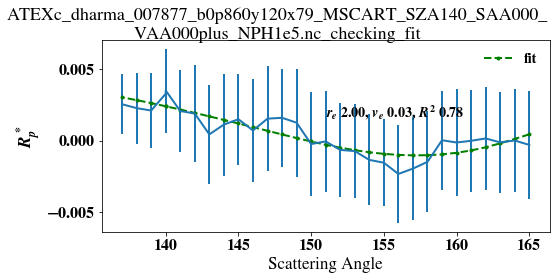

In [282]:
yerr=(RT.RMSEPRad[:,1]*gemet)[P.Q_a1:P.Q_a2]
fig6_ttl=RT.fname+'_checking_fit'
#fig1,ax1=check_fit2(y,x,out[2],out[0],out[1],out[4],P12Lib,LEScase,method,primaryBow=primaryBow)

fig6,ax6=plt.subplots(figsize=(8,4))
P.set_reve(ret_Re,ret_Ve)
ax6.plot(x,P.imitateF(x,*abc),'g.--',label='fit')
ax6.errorbar(x,y,yerr=yerr)
#    ax6.plot(RT.ScatA[P.Q_a1:P.Q_a2],-P.getP(RT.ScatA[P.Q_a1:P.Q_a2]),'r--')
ax6.text(0.5,0.6,r'$r_e$ %0.2f, $v_e$ %0.2f, $R^2$ %0.2f'%(ret_Re,ret_Ve,Rsq),transform=ax6.transAxes,size=14)
ax6.set_xlabel('Scattering Angle')
ax6.set_ylabel(r'$R_p^*$')
ax6.legend(frameon=False,loc='best')
fig6.suptitle("\n".join(wrap(fig6_ttl,55)))
fig6.tight_layout(rect=[0,0,1,0.92])


In [271]:
cpn.savefig(fig6,fig6_ttl,'figures/')

figures/ATEXc_dharma_007877_b0p860y79x120_MSCART_SZA140_SAA000_VAA000plus_NPH1e5pnc_checking_fit.png SAVED.


In [198]:
yerr.shape

(30,)

In [199]:
x.shape

(30,)

In [200]:
y.shape

(30,)

In [46]:
x

array([165., 164., 163., 162., 161., 160., 159., 158., 157., 156., 155.,
       154., 153., 152., 151., 150., 149., 148., 147., 146., 145., 144.,
       143., 142., 141., 140., 139., 138., 137., 136.])

In [47]:
x.shape

(30,)

In [48]:
y.shape

(31,)

In [51]:
Q_in2[P.Q_a1:P.Q_a2].shape

(31,)

In [203]:
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)
    Plot y versus x as lines and/or markers with attached errorbars.
    
    *x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
    sizes. By default, this draws the data markers/lines as well the
    errorbars. Use fmt='none' to draw errorbars without any data markers.
    
    Parameters
    ----------
    x, y : scalar or array-like
        The data positions.
    
    xerr, yerr : scalar or array-like, shape(N,) or shape(2,N), optional
        The errorbar sizes:
    
        - scalar: Symmetric +/- values for all data points.
        - shape(N,): Symmetric +/-values for each data point.
        - shape(2,N): Separate - and + values for each bar. First row
            contains the lower errors

In [53]:
P.Q_a2

66